# Aviachipta narxini bashorat qilish

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL = "train_data.csv"
df = pd.read_csv(URL)
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


# Ma'lumotlarni o'rganamiz, analiz qilib va kerakli o'zgartrishlarni bajaramiz

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [4]:
df.shape

(20000, 12)

**Bizdagi ma'lumotlarga ko'ra 20000 ta parvoz('flight') ro'yxati berilgan va ularning narxi('price'), uchish vaqti('departure_time') va qo'nish vaqti('arrival_time'), davomiyligi('duration'), aviakompaniyasi('airline'), chiquvchi va kiruvchi shaharlar('source_city' & 'destination_city'), parvoz davomidagi to'xtalishlar ('stops'), parvoz klassi ('class') berilgan.**

In [5]:
df.isnull().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

**Ma'lumotlarimizni NaN qiymatga tekshirdik. Demak ma'lumotlarimiz NaN qiymatlardan toza ekan.**

In [6]:
df.describe()

,id,duration,days_left,price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,12.177627,25.924150,20960.281700
std,5773.647028,7.157944,13.624874,22775.459535
min,1.000000,0.830000,1.000000,1105.000000
25%,5000.750000,6.830000,14.000000,4783.000000
50%,10000.500000,11.250000,26.000000,7425.000000
75%,15000.250000,16.080000,38.000000,42521.000000
max,20000.000000,38.580000,49.000000,114523.000000


**Yuqoridagi jadval bizga sonli ustunlardagi o'rtacha, max, min va boshqa qiymatlarni ko'rsatadi.**

In [7]:
pd.DataFrame(df[['airline','class','stops']].value_counts()).unstack().fillna(0)

count                   
stops                  one two_or_more   zero
airline   class                              
AirAsia   Economy    741.0       168.0  147.0
Air_India Business  1970.0        12.0  224.0
          Economy   2750.0       199.0  216.0
GO_FIRST  Economy   1239.0        27.0  242.0
Indigo    Economy   2124.0        55.0  745.0
SpiceJet  Economy    436.0         0.0  170.0
Vistara   Business  3638.0        65.0  338.0
          Economy   3768.0       368.0  358.0

**Bizdagi ma'lumotlarga ko'ra aviakompaniyalar va ularning parvozlar soni eng ko'p parvoz Vistara va Air_India kompaniyalariga tegishli ekan, bundan tashqari ushbu jadval orqali parvoz turlari yani klasslari haqidagi ma'lumotlar va parvoz davomidagi to'xtalishlar sonini ham ko'rishimiz mumkin.
Masalan: Indigo kompaniyasi tomonidan yo'lga qo'yilgan parvozlar (2924 ta) faqat Ekanom klassda va parvozlarning katta qismi (2124 ta) parvoz davomida bir marta to'xtab so'ng parvozni davom ettirar ekan.**

In [8]:
pd.DataFrame(df[['source_city','destination_city']].value_counts()).unstack().fillna('-')

count                                         
destination_city Bangalore Chennai   Delhi Hyderabad Kolkata Mumbai
source_city                                                        
Bangalore                -   456.0   884.0     568.0   669.0  909.0
Chennai              418.0       -   652.0     432.0   487.0  595.0
Delhi                885.0   730.0       -     618.0   808.0  981.0
Hyderabad            539.0   439.0   576.0         -   535.0  659.0
Kolkata              663.0   452.0   711.0     492.0       -  774.0
Mumbai               920.0   618.0  1002.0     704.0   824.0      -

**Berilgan ma'lumotlardan ushbu jadvalni tuzib oldik, bu jadvalda asosan 6 ta shahardagi parvozlar va ularning qaysi shaharlarga ekanligi va soni ko'rsatilgan. Masalan: Delhi shahridan 5 ta shahrga parvozlar yo'lga qo'yilgan ulardan eng ko'pi Mumbai shahriga ekan(981 ta).**

In [9]:
pd.DataFrame(df[['airline','source_city']].value_counts()).unstack()

count                                       
source_city Bangalore Chennai Delhi Hyderabad Kolkata Mumbai
airline                                                     
AirAsia           225      94   292       116     187    142
Air_India         863     664  1116       719     809   1200
GO_FIRST          279      99   367       165     235    363
Indigo            451     437   553       450     537    496
SpiceJet           79      93   164        18     132    120
Vistara          1589    1197  1530      1280    1192   1747

**Bu jadvalda aviakompaniyalarning parvozlari nechtasi qaysi shahardan yo'lga qo'yilgani ko'rsatilgan.**

In [10]:
pd.DataFrame(df[['airline','departure_time']].value_counts()).unstack().fillna('-')

count                                                 
departure_time Afternoon Early_Morning Evening Late_Night Morning   Night
airline                                                                  
AirAsia            198.0         264.0   242.0        9.0   147.0   196.0
Air_India          728.0        1256.0  1231.0       23.0  1205.0   928.0
GO_FIRST           304.0         406.0   315.0       11.0   271.0   201.0
Indigo             675.0         541.0   609.0       49.0   764.0   286.0
SpiceJet            75.0         204.0   135.0          -    89.0   103.0
Vistara           1186.0        1761.0  1809.0          -  2262.0  1517.0

**Bu jadvalda aviakompaniyalarning parvozlari asosan kunning qaysi vaqtlarida yo'lga qo'yilgani ko'rsatilgan.**

In [11]:
pd.DataFrame(df[['source_city','departure_time']].value_counts()).unstack()

count                                               
departure_time Afternoon Early_Morning Evening Late_Night Morning Night
source_city                                                            
Bangalore            343           900     920         36     843   444
Chennai              368           624     386          5     724   477
Delhi                768           817    1092         20     875   450
Hyderabad            502           536     380          2     696   632
Kolkata              515           559     638         10     800   570
Mumbai               670           996     925         19     800   658

**Bu jadvalda aviakompaniyalarning parvozlari asosan qaysi shahardan kunning qaysi vaqtlarida yo'lga qo'yilgani ko'rsatilgan.**

In [12]:
pd.DataFrame(df[['class','stops','departure_time']].value_counts()).unstack().fillna('-')

count                                           \
departure_time       Afternoon Early_Morning Evening Late_Night Morning   
class    stops                                                            
Business one             750.0        1140.0  1239.0        7.0  1369.0   
         two_or_more      21.0          33.0    16.0          -     6.0   
         zero             88.0         110.0   151.0        1.0   117.0   
Economy  one            1892.0        2494.0  2283.0       54.0  2701.0   
         two_or_more     163.0         221.0   140.0        3.0   253.0   
         zero            252.0         434.0   512.0       27.0   292.0   

                              
departure_time         Night  
class    stops                
Business one          1103.0  
         two_or_more     1.0  
         zero           95.0  
Economy  one          1634.0  
         two_or_more    37.0  
         zero          361.0

**Bu jadvalda aviakompaniyalarning parvoz klasslari kunning qaysi vaqtlarida yo'lga qo'yilgani ko'rsatilgan va qaysi vaqtdagi parvozlarda nechta to'xtalishlar mavjudligi ko'rsatilgan**

# Ma'lumotlarimizning yarimdan ko'p ustunlari obyekt tipida ularni sonli ustunga aylantrib chiqamiz.

In [13]:
df_num = df.drop(['id','flight','duration','days_left','price'], axis=1)
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_num = ordinal_encoder.fit_transform(df_num)
df_num = pd.DataFrame(df_num)
dict = {0:'airline',1:'source_city',2:'departure_time',3:'stops',4:'arrival_time',5:'destination_city',6:'class'}
df_num.rename(columns=dict, inplace=True)

**Sonli tipga aylantrilgan va qolgan ustunlarning biz bashorat qilishimiz kerak bo'lgan Aviakompaniya chipta narxiga ta'sirini ko'rib chiqamiz.**

In [14]:
df_corr = df.copy()
df_corr[['airline','source_city','departure_time','stops','arrival_time','destination_city','class']] = df_num[['airline','source_city','departure_time','stops','arrival_time','destination_city','class']]
df_corr.drop(['flight','id'],axis=1).corrwith(df_corr['price']).sort_values(ascending=False)

price               1.000000
airline             0.241193
duration            0.213158
departure_time      0.058520
arrival_time        0.046801
source_city         0.013570
destination_city    0.008747
days_left          -0.102545
stops              -0.201309
class              -0.937868
dtype: float64

**Demak yuqoridagi ro'yxat bizga chipta narxiga qaysi omillarning eng ko'p ta'sir qilishini ko'rsatmoqda( [-1:1] oraliqda).**

**Eng katta ko'rsatkich bilan parvoz klassi -0.93, aviakompaniya 0.24, parvoz davomiyligi 0.21 va parvozdagi to'xtalishlar -0.20. Ushbu ko'rsatkichlar bizga chipta narxini bashorat qilishda asosiy omillar sifatida ko'rsatiladi.**

# Ma'lumotlarni Vizual taxlil qilamiz

C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


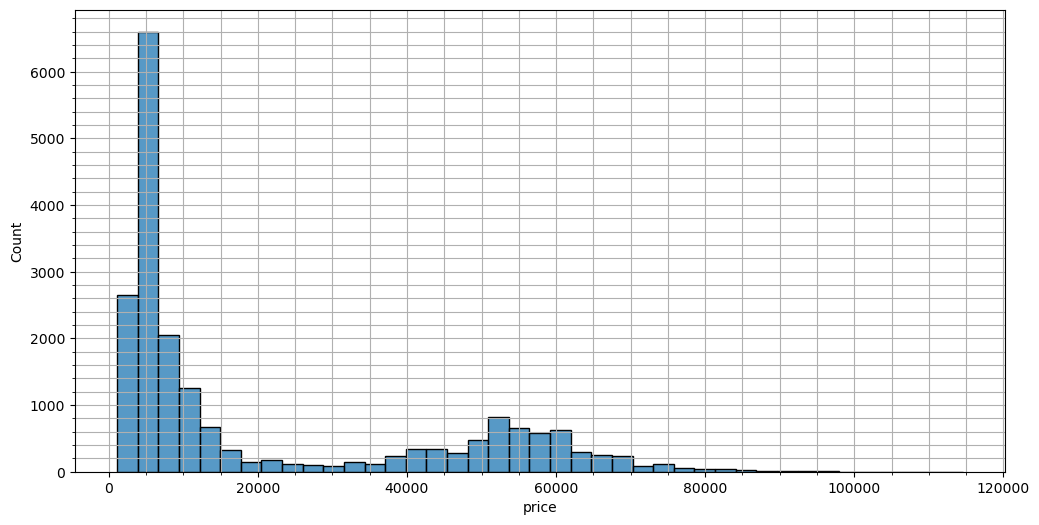

In [15]:
df1=df[df['price']<150000]
plt.figure(figsize=(12,6))
sns.histplot(data=df1, x='price')
plt.grid(which='both')
plt.minorticks_on()
plt.show()

**Bizga berilgan ma'lumotdagi narxlarning vizual ko'rinish. Grafikdan chiptalarning katta qismi 15000 dan arzon ekan.**

C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


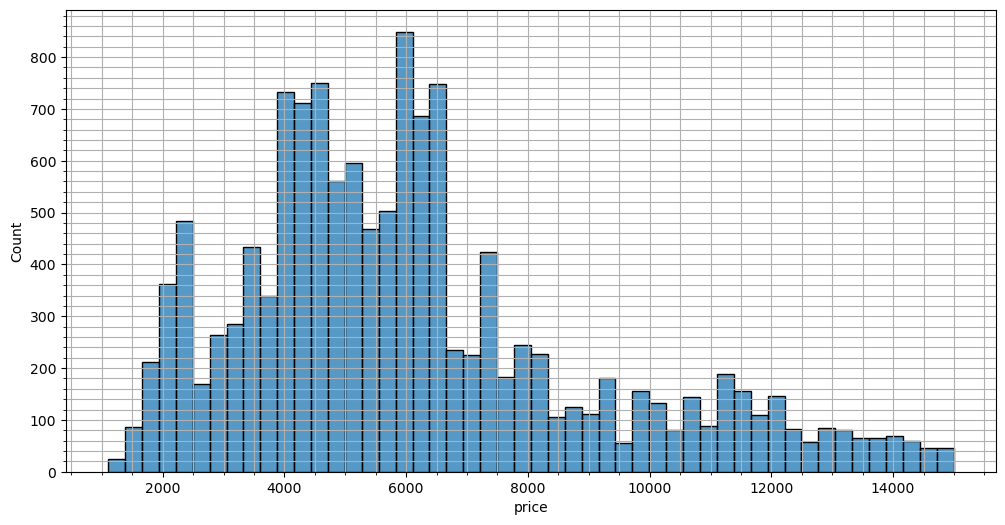

In [16]:
df1=df[df['price']<15000]
plt.figure(figsize=(12,6))
sns.histplot(data=df1, x='price')
plt.grid(which='both')
plt.minorticks_on()
plt.show()

**Buni yanaham aniqroq qilib ko'ramiz**

C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


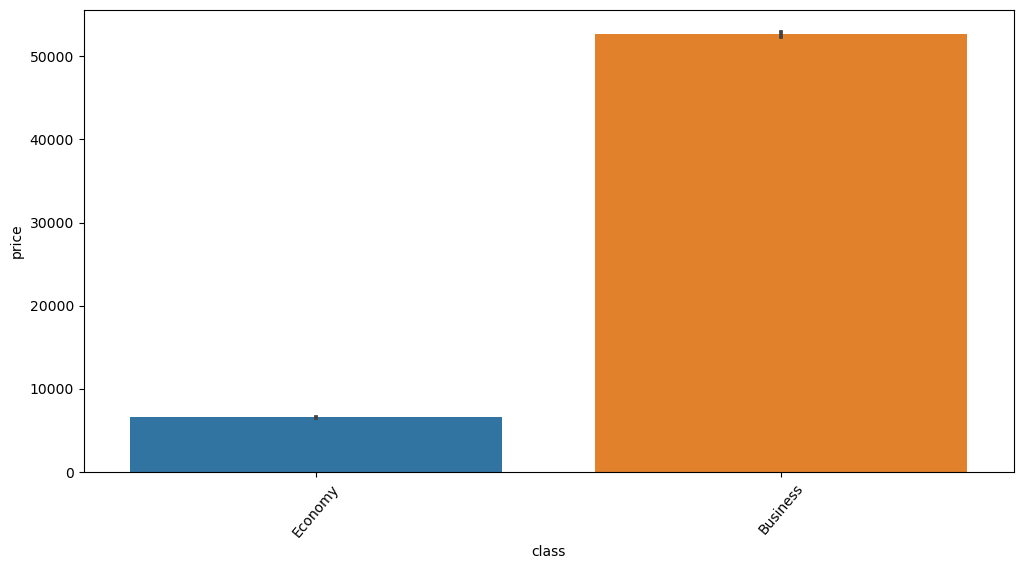

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(y=df['price'],x=df['class'])
plt.xticks(rotation=50)
plt.show()

**Chipta narxiga ta'sir qiluvchi 'class' omilining chipta narxi bilan bog'liqlik grafigi. Ushbu grafikda chipta narxi Business class da qimmat Exonomy class da arzon bo'lishini ko'rishimiz mumkin.**

C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

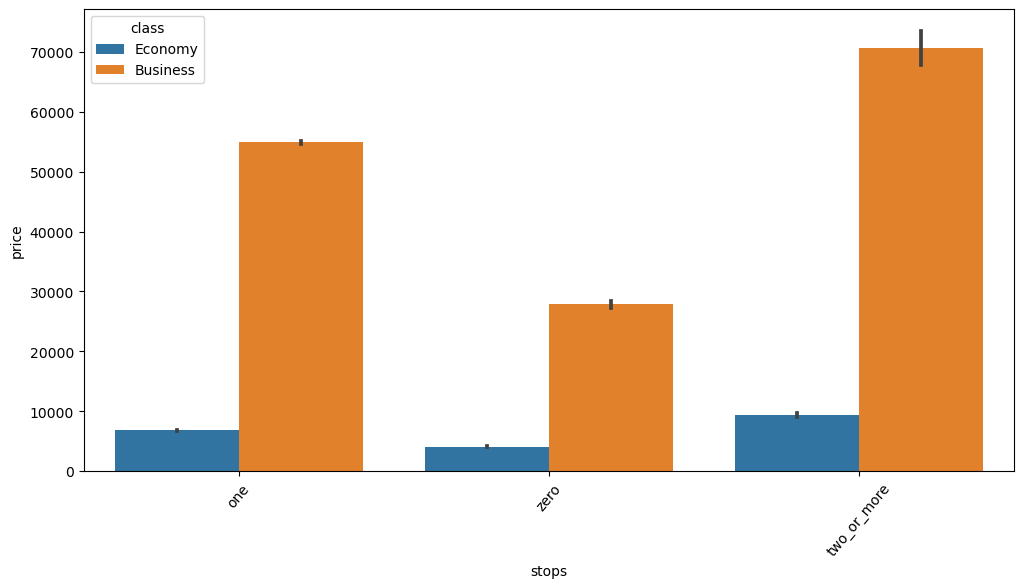

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(y=df['price'],x=df['stops'],hue=df['class'])
plt.xticks(rotation=50)
plt.show()

**Chipta narxiga ta'sir qiluvchi 'stops' omilining chipta narxi bilan bog'liqlik grafigi 'class' taqsimida.**

C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


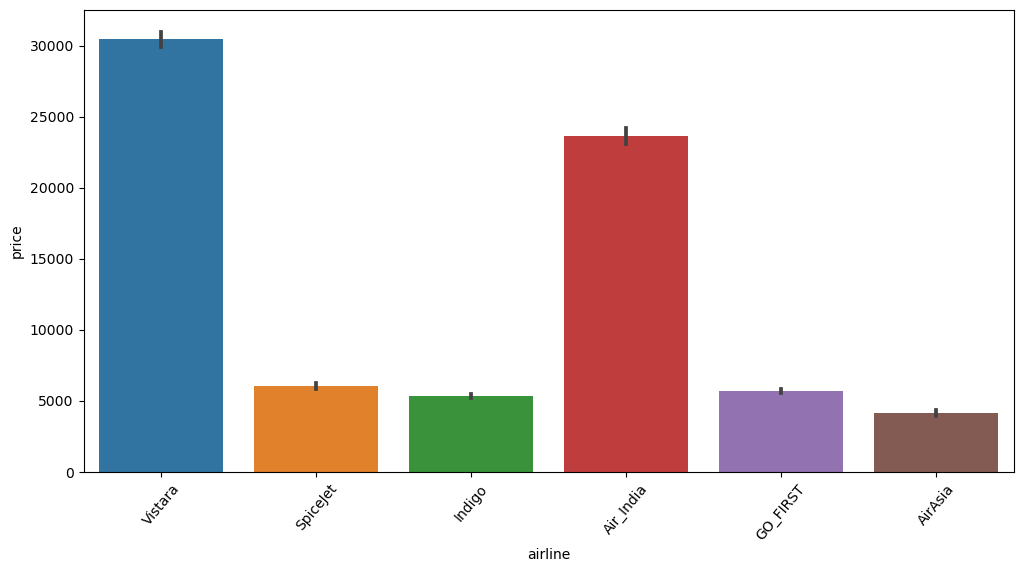

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(y=df['price'],x=df['airline'])
plt.xticks(rotation=50)
plt.show()

**Chipta narxiga ta'sir qiluvchi 'airline' aviakompaniyalar chipta narxi bilan bog'liqlik grafigi. Ushbu grafikda chipta narxi ayrim kompaniyalar tomonidan qimmat sotilaishi va ayrimlarida arzon ekanligini ko'rishimiz mumkin.**

C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

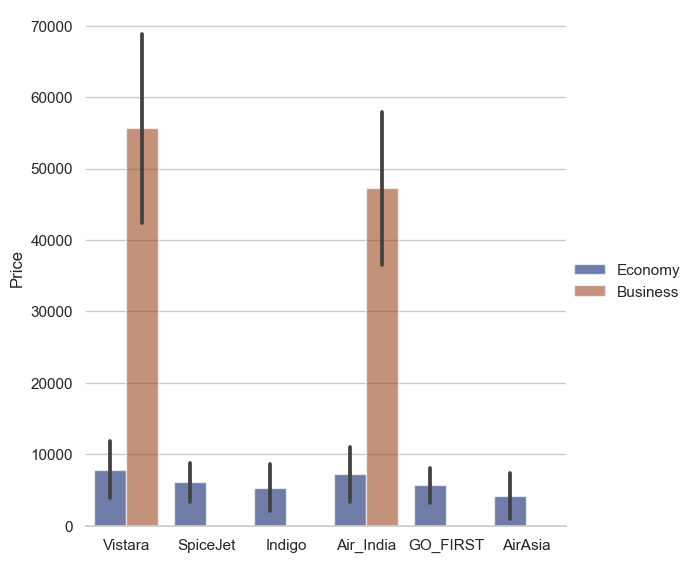

In [20]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="airline", y="price", hue="class",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Price")
g.legend.set_title("")

**Chipta narxining aviakompaniyalar va parvoz klasslari bilan bog'liqlgi.**

C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Khaydaraliev_97\anaconda3\envs\datasince\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

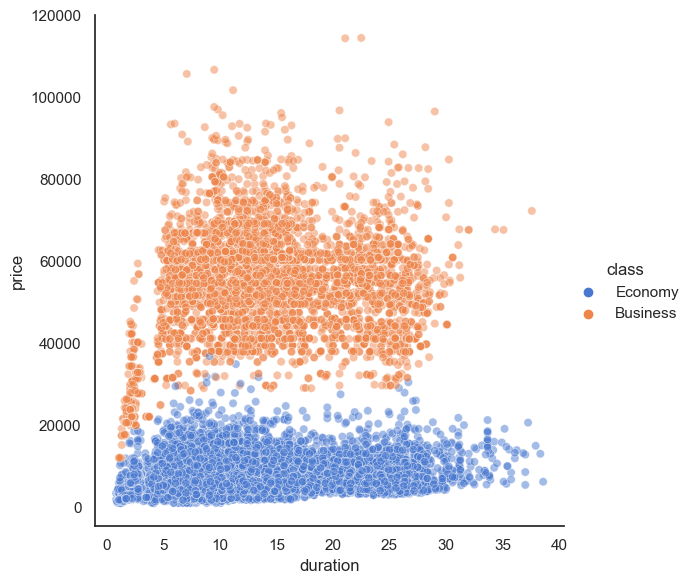

In [21]:
sns.set_theme(style="white")
sns.relplot(x="duration", y="price", hue="class",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

**Chipta narxining parvoz davomiyligi va parvoz klasslari bilan bog'liqligi. Parvoz davomiyligi bilan chipta narxining uncha katta bo'lmagan bog'liqligi grafikda yaqqol ko'ringan, lekin parvoz klassi bilan bo'lgan bo'gliqlik juda yaxshi ko'rinib turibdi.**

# Ma`lumotlarni ML uchun tayyolrash

In [22]:
URL = "train_data.csv"
df = pd.read_csv(URL)
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinetAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        df_m = X.copy()
        df_m.drop(['id','flight'], axis=1, inplace=True)
    
        return df_m

combined_adder = CombinetAttributesAdder()

transformed_data = combined_adder.transform(df)

df_m = transformed_data

In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_m, test_size=0.2, random_state=28)

X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

X_num = X_train.drop(['airline','source_city','departure_time','stops','arrival_time','destination_city','class'], axis=1)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())
])

In [26]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OrdinalEncoder(), cat_attribs)
])

In [27]:
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared[0:5,:]

array([[-0.93868953,  0.74410824,  2.        ,  0.        ,  0.        ,
         0.        ,  2.        ,  2.        ,  1.        ],
       [ 0.13070564,  1.11143532,  1.        ,  4.        ,  1.        ,
         0.        ,  5.        ,  0.        ,  1.        ],
       [ 1.6663906 , -0.06401134,  1.        ,  0.        ,  4.        ,
         0.        ,  4.        ,  3.        ,  1.        ],
       [ 0.09580371,  1.4787624 ,  5.        ,  2.        ,  1.        ,
         0.        ,  5.        ,  5.        ,  1.        ],
       [ 0.28287806,  1.62569324,  0.        ,  2.        ,  2.        ,
         0.        ,  4.        ,  3.        ,  1.        ]])

# Machine Learning
**Linear Regression**

In [28]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [29]:
LR_model.fit(X_prepared, y)

LinearRegression()

In [30]:
# tasodifiy 5 ta qatorni ajratib olamiz
test_data = X_train.sample(5)
test_data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
10783,SpiceJet,Delhi,Evening,one,Early_Morning,Chennai,Economy,12.25,21
5258,Vistara,Bangalore,Morning,one,Morning,Kolkata,Business,24.17,27
12997,Air_India,Hyderabad,Night,one,Morning,Kolkata,Economy,12.17,29
13088,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,25
4039,Vistara,Chennai,Morning,one,Night,Bangalore,Economy,10.17,6


In [31]:
test_label = y.loc[test_data.index]
test_label

10783     4149
5258     57529
12997     5734
13088     2700
4039     15794
Name: price, dtype: int64

In [32]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[ 1.48312266e-02, -3.57873000e-01,  4.00000000e+00,
         2.00000000e+00,  2.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.67895530e+00,  8.29194969e-02,  5.00000000e+00,
         0.00000000e+00,  4.00000000e+00,  0.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  0.00000000e+00],
       [ 3.66260864e-03,  2.29850329e-01,  1.00000000e+00,
         3.00000000e+00,  5.00000000e+00,  0.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  1.00000000e+00],
       [-1.40497933e+00, -6.40113354e-02,  5.00000000e+00,
         2.00000000e+00,  4.00000000e+00,  2.00000000e+00,
         4.00000000e+00,  5.00000000e+00,  1.00000000e+00],
       [-2.75552840e-01, -1.45985424e+00,  5.00000000e+00,
         1.00000000e+00,  4.00000000e+00,  0.00000000e+00,
         5.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [33]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([ 9012.51031357, 55588.40659676,  5790.66069529,  2602.13530292,
       12155.40037203])

In [34]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
10783,9012.510314,4149
5258,55588.406597,57529
12997,5790.660695,5734
13088,2602.135303,2700
4039,12155.400372,15794


In [35]:
test_set

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
3826,Air_India,Bangalore,Afternoon,one,Evening,Kolkata,Business,5.83,35,60508
1731,Vistara,Bangalore,Evening,one,Evening,Kolkata,Economy,24.25,12,11205
2959,Vistara,Delhi,Evening,one,Morning,Mumbai,Business,17.83,2,59996
19149,Air_India,Mumbai,Evening,two_or_more,Night,Bangalore,Economy,30.17,47,8332
18521,Vistara,Hyderabad,Morning,two_or_more,Night,Bangalore,Economy,9.42,21,11367
...,...,...,...,...,...,...,...,...,...,...
3213,Air_India,Mumbai,Night,one,Evening,Chennai,Business,21.50,23,49613
12683,Air_India,Hyderabad,Night,one,Night,Bangalore,Economy,23.25,18,6314
19272,Air_India,Bangalore,Afternoon,one,Night,Delhi,Business,7.75,24,37658
15113,Indigo,Hyderabad,Early_Morning,one,Afternoon,Bangalore,Economy,9.08,14,4453


In [36]:
X_test = test_set.drop('price', axis=1)
X_test

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
3826,Air_India,Bangalore,Afternoon,one,Evening,Kolkata,Business,5.83,35
1731,Vistara,Bangalore,Evening,one,Evening,Kolkata,Economy,24.25,12
2959,Vistara,Delhi,Evening,one,Morning,Mumbai,Business,17.83,2
19149,Air_India,Mumbai,Evening,two_or_more,Night,Bangalore,Economy,30.17,47
18521,Vistara,Hyderabad,Morning,two_or_more,Night,Bangalore,Economy,9.42,21
...,...,...,...,...,...,...,...,...,...
3213,Air_India,Mumbai,Night,one,Evening,Chennai,Business,21.50,23
12683,Air_India,Hyderabad,Night,one,Night,Bangalore,Economy,23.25,18
19272,Air_India,Bangalore,Afternoon,one,Night,Delhi,Business,7.75,24
15113,Indigo,Hyderabad,Early_Morning,one,Afternoon,Bangalore,Economy,9.08,14


In [37]:
y_test = test_set['price'].copy()
y_test

3826     60508
1731     11205
2959     59996
19149     8332
18521    11367
         ...  
3213     49613
12683     6314
19272    37658
15113     4453
11293     5177
Name: price, Length: 4000, dtype: int64

In [38]:
X_test_prepared = full_pipeline.transform(X_test)

In [39]:
y_predicted = LR_model.predict(X_test_prepared)

In [40]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

6778.915925019605


**Decision Tree Regressor**

In [41]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [42]:
predicted_data = Tree_model.predict(test_data_prepared)
predicted_data

array([ 4149., 57529.,  5734.,  2700., 15794.])

In [43]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
10783,4149.0,4149
5258,57529.0,57529
12997,5734.0,5734
13088,2700.0,2700
4039,15794.0,15794


In [44]:
y_predicted = Tree_model.predict(X_test_prepared)

In [45]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

4775.6188429158055


**Random Forest Regressor**

In [46]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [47]:
predicted_data = RF_model.predict(test_data_prepared)
predicted_data

array([ 4176.04, 56375.68,  5477.05,  2743.63, 14649.79])

In [48]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
10783,4176.04,4149
5258,56375.68,57529
12997,5477.05,5734
13088,2743.63,2700
4039,14649.79,15794


In [49]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

3723.401264161959


In [50]:
X = df_m.drop("price", axis=1)
y = df_m["price"].copy()

X_prepared = full_pipeline.transform(X)

In [51]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [53]:
display_scores(LR_rmse_scores)

Scores: [6988.08116014 7030.10072528 6928.65280225 6590.77356639 7081.78997056
 6937.93226622 7250.7341072  6829.46910974 6963.13807353 7287.47958372]
Mean: 6988.81513650446
Std.dev: 189.43270305674034


In [54]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [4682.83935232 5092.4559532  5232.38252525 4515.2110891  4784.12171864
 5062.11959245 5403.48883764 4945.35333274 4813.96763795 5163.63351751]
Mean: 4969.557355678555
Std.dev: 258.17224951796726


In [55]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [3625.62769836 3907.61190627 3990.37627937 3548.11253505 3719.42588344
 3813.09511476 4014.97566348 3780.19205259 3728.53898408 3893.20002927]
Mean: 3802.1156146671624
Std.dev: 144.46285669880723


# **TEST_DATA ni yuklab undagi ma'lumotlar asosida aviachipta narxini bashorat qilamiz.**

In [56]:
URL = "test_data.csv"
df_test = pd.read_csv(URL)
df_test.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [57]:
df_test.columns

Index(['id', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left'],
      dtype='object')

In [58]:
aviaprice_prepared = full_pipeline.fit_transform(df_test)

In [59]:
y_predicted = RF_model.predict(aviaprice_prepared)

In [60]:
URL = "sample_solution.csv"
df_sample = pd.read_csv(URL)
df_sample['price'] = pd.DataFrame(y_predicted)
df_sample

,id,price
0,1,53953.14
1,2,55444.91
2,3,23294.56
3,4,2567.23
4,5,5530.64
...,...,...
4995,4996,59574.45
4996,4997,4615.43
4997,4998,49740.07
4998,4999,48840.16
